###### Credit : superdatascience.com

Business case : Predict the net hourly electrical energy output (EP) of the power plant

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [31]:
import tensorflow as tf

## Data

* Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V)
* net hourly electrical energy output (EP)

In [32]:
dataset = pd.read_excel('Folds5x2_pp.xlsx')

In [33]:
dataset.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [34]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Preprocessing

##### Missing Values

<Axes: >

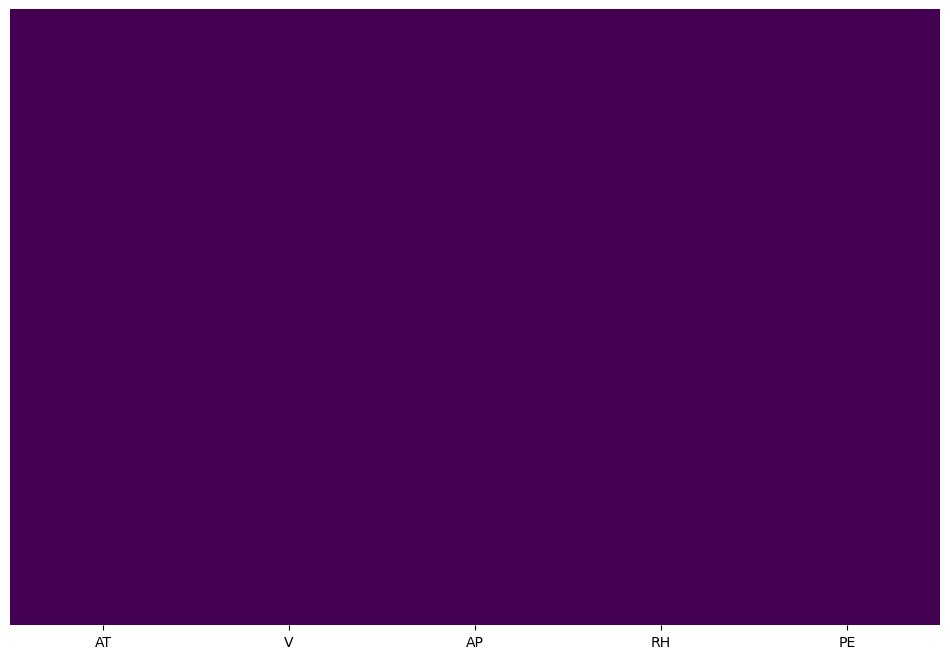

In [35]:
plt.rcParams['figure.figsize'] = 12, 8
sns.heatmap(dataset.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

##### Set Split

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

##### Feature Scaling

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test =  sc.transform(X_test)

## 1/ Artificial Neural Network

##### Model

In [9]:
ann = tf.keras.models.Sequential()

ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))

ann.add(tf.keras.layers.Dense(units = 1))

ann.compile(optimizer = 'adam', loss = 'mean_squared_error')

##### Training

In [11]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100

240/240 [==============================] - 1s 832us/step - loss: 205641.5156
Epoch 2/100
240/240 [==============================] - 0s 909us/step - loss: 196423.9531
Epoch 3/100
240/240 [==============================] - 0s 877us/step - loss: 164068.7188
Epoch 4/100
240/240 [==============================] - 0s 870us/step - loss: 107505.3984
Epoch 5/100
240/240 [==============================] - 0s 885us/step - loss: 52833.7852
Epoch 6/100
240/240 [==============================] - 0s 881us/step - loss: 27998.0996
Epoch 7/100
240/240 [==============================] - 0s 865us/step - loss: 21195.3809
Epoch 8/100
240/240 [==============================] - 0s 839us/step - loss: 17524.9004
Epoch 9/100
240/240 [==============================] - 0s 842us/step - loss: 14154.7080
Epoch 10/100
240/240 [==============================] - 0s 867us/step - loss: 10972.8291
Epoch 11/100
240/240 [==============================] - 0s 881us/step - loss: 8076.6016
Epoch 12/100
240/240 [====

240/240 [==============================] - 0s 863us/step - loss: 20.9139
Epoch 94/100
240/240 [==============================] - 0s 803us/step - loss: 20.9388
Epoch 95/100
240/240 [==============================] - 0s 850us/step - loss: 20.8599
Epoch 96/100
240/240 [==============================] - 0s 880us/step - loss: 20.9677
Epoch 97/100
240/240 [==============================] - 0s 871us/step - loss: 20.8734
Epoch 98/100
240/240 [==============================] - 0s 865us/step - loss: 21.0142
Epoch 99/100
240/240 [==============================] - 0s 830us/step - loss: 20.9201
Epoch 100/100
240/240 [==============================] - 0s 863us/step - loss: 20.9158


##### Prediction

In [12]:
y_pred = ann.predict(X_test)
np.set_printoptions(precision = 2)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

60/60 [==============================] - 0s 670us/step
[[431.13 431.23]
 [458.54 460.01]
 [462.48 461.14]
 ...
 [469.38 473.26]
 [442.02 438.  ]
 [461.19 463.28]]


#####  Evaluation

In [13]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9340007086749255

## 2/ Linear Regression

##### Model

In [14]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

##### Prediction

In [16]:
lr_pred = lr.predict(X_test)

##### Evaluation

In [18]:
from sklearn.metrics import r2_score
r2_score(y_test, lr_pred)

0.9325315554761302

## 3/ Polynomial Regression

##### Model

In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
pr = LinearRegression()
pr.fit(X_poly, y_train)

LinearRegression()

##### Prediction

In [20]:
pr_pred = pr.predict(poly_reg.transform(X_test))

##### Evaluation

In [22]:
from sklearn.metrics import r2_score
r2_score(y_test, pr_pred)

0.9459040420184242

## 4/ Support Vector Regression

##### Data

In [51]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [52]:
y = y.reshape(len(y), 1)

##### Set Split

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

##### Feature Scaling

In [54]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_svr = sc_X.fit_transform(X_train)
y_train_svr = sc_y.fit_transform(y_train)

##### Model

In [55]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(X_train_svr, y_train_svr)

C:\Users\Dahee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [56]:
svr_pred = sc_y.inverse_transform(svr.predict(sc_X.transform(X_test)).reshape(-1, 1))

In [57]:
from sklearn.metrics import r2_score
r2_score(y_test, svr_pred)

0.948078404998626

## 5/ Decision Tree Regression

##### Feature Scaling

In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

##### Model

In [59]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state = 0)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

##### Prediction

In [60]:
dtr_pred = dtr.predict(X_test)

##### Evaluation

In [61]:
from sklearn.metrics import r2_score
r2_score(y_test, dtr_pred)

0.9231106384743017

## 6/ Random Forest Regression

##### Model

In [62]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 10, random_state = 0)
rfr.fit(X_train, y_train)

C:\Users\Dahee\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=10, random_state=0)

##### Prediction

In [64]:
rfr_pred = rfr.predict(X_test)

##### Evaluation

In [65]:
from sklearn.metrics import r2_score
r2_score(y_test, rfr_pred)

0.9616158339974077